# Post-processing 
## Ne Mg window - trained, gain 0.1-3, no log or normalization

In [1]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
parent_dir1 = os.path.abspath(os.path.join(parent_dir, '..'))
sys.path.append(parent_dir1)

import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from torch import nn
import torch.nn.functional as F
from simspice.data.SproutDataset_NeMg import SproutDataset
from torch.utils.data import DataLoader
from pytorch_lightning.callbacks import ModelCheckpoint
import torch
import numpy as np
import matplotlib.pyplot as plt
from cuml.cluster.hdbscan import HDBSCAN
import matplotlib.pyplot as plt
import simspice.utils.inverse_mapping_functions as imf
# import simspice.models.Siamese_Architecture as SA
# import simspice.models.Siamese_Architecture_Transformer as SA
import simspice.models.Siamese_Architecture_Resnet as SA
# import simspice.models.SimCLR_Architecture_Resnet as SA
#import umap.umap_ as umap
import tqdm
from datetime import datetime

plt.rcParams['image.origin'] = 'lower'

In [2]:
simspice = "/d0/tvaresano/SimSPICE/"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

id = 'resnet50_SimSiam_NeMg_gain01-3'

Unique Clusters in file: 26


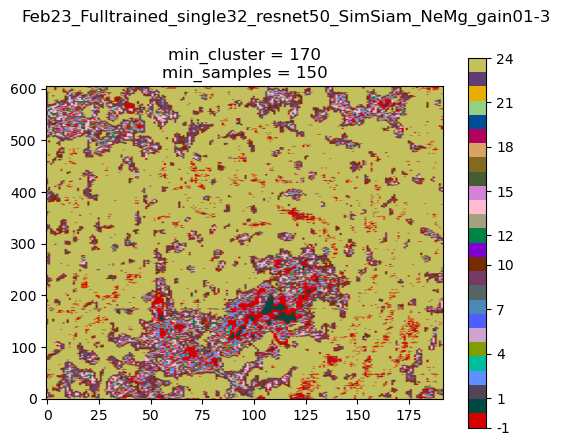

In [3]:
x,y = 170,150
labels = np.load(simspice+f'notebooks/jobs/clustering/Fulltrained_single32_{id}_minclus{x}_minsamp{y}.npy')
imf.map_clusters(labels, dataset_path=simspice+'spectra_Feb2023.nc')
plt.title(f"min_cluster = {x}\nmin_samples = {y}")
plt.suptitle(f'Feb23_Fulltrained_single32_{id}')
plt.show()

Unique Clusters in file: 26


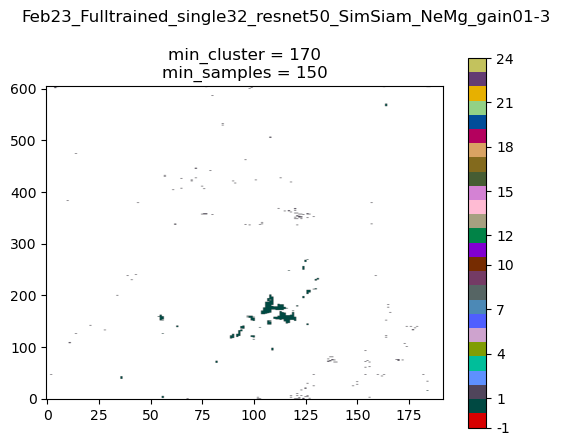

In [4]:
imf.map_clusters(labels, dataset_path=simspice+'spectra_Feb2023.nc', selected_clusters=[0,1])
plt.title(f"min_cluster = {x}\nmin_samples = {y}")
plt.suptitle(f'Feb23_Fulltrained_single32_{id}')
plt.show()